### Next, we will discuss the [Elastic Nets](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and [here](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

### The Lasso regularization (or $l_1$) tends force many coefficients to zero and essentially reduces the number of features (or compress the data). This may be helpful in problems in which feature selection/reduction is desired. However, if we have correlated features in the data, Lasso will pick up only one and set the coefficients of the rest correlated features to zero. This may be problematic in some problems (e.g. gene target problems where you want to identify targets that may be correlated).
### The Ridge regularization (or $l_2$) works better if there are groups of correlated variables (multicollinearity; think genes abc1, abc2, abc3). Ridge tends to shrink the coefficients of the whole group proportionally. In contrast, Lasso will set all to zero at some point and keep only one variable to use in the model.
### How do you choose which one to use? Lasso or Ridge? 
### Elastic Nets combine both Lasso and Ridge, $\min_{w}\|Xw-y\|_2^2 + \alpha \times l1_{ratio} \|w\|_1 + 0.5 \times\alpha \times (1-l1_{ratio}) \|w\|_2^2$ 
### $l1_{ratio}$ takes values between 0 and 1. For $l1_{ratio} = 0$ we have a pure $l_2$ problem. For $l1_{ratio} = 1$ we have a pure $l_1$ problem.
### Typically, you run the problem for different values of $\alpha$ and $l1_{ratio}$ values and follow the performance of the classifier/regressor
### Below, we follow the [Sklearn example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py) that uses the [diabetes regression dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset).


Automatically created module for IPython interactive environment
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


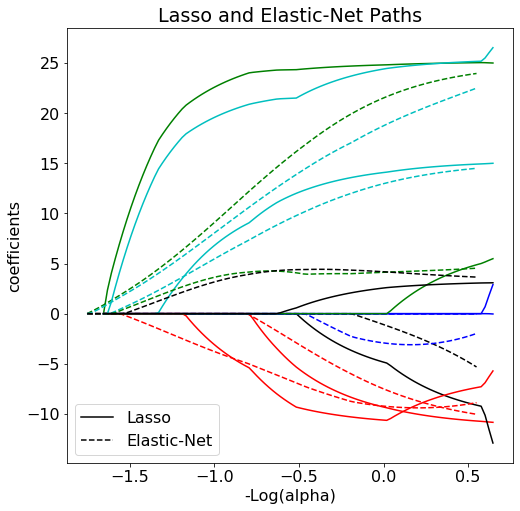

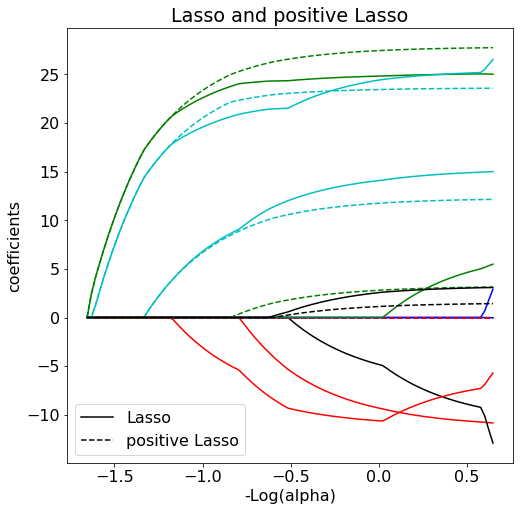

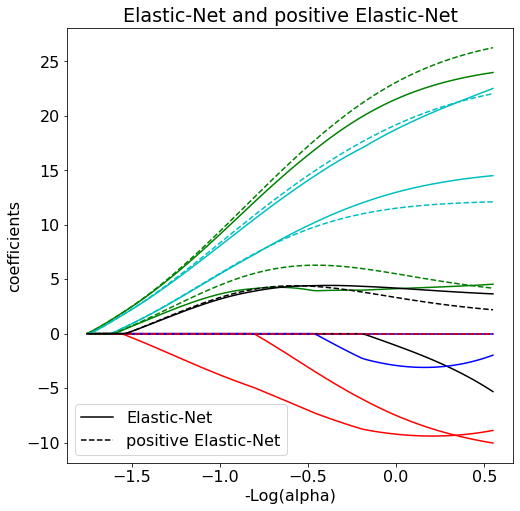

In [5]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()